##### *Python libraries used in this notebook*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wg
from IPython.display import display
from scipy.integrate import odeint

# PID control

## Interactive simulation of PID controller tuning

### Abstract
This notebook demonstrates а tuning of a PID controller using Ziegler-Nichols method.

TODO:

### Table of Contents

* [1. Description of Control System](#chapter1)
    * [1.1. Description of Control Loop](#section_1_1)
        * [1.1.1. Open Loop Control System](#section_1_1_1)
        * [1.1.2. Closed Loop Control System](#section_1_1_2)
* [2. PID Controller introduction](#chapter2)
    * [2.1. PID Controller theory](#section_2_1)
        * [2.1.1. Interactive algorithm](#section_2_1_1)
        * [2.1.2. Noninteractive algorithm](#section_2_1_2)
        * [2.1.3. Parallel algorithm](#section_2_1_3)
    * [2.2. PID Controller terms](#section_2_2)
        * [2.2.1. Proportional term ](#section_2_2_1)
        * [2.2.2. Integral component](#section_2_2_2)
        * [2.2.3. Derivative component](#section_2_2_3)
    * [2.3. PID Controller tuning methods](#section_2_3)
        * [2.3.1. Ziegler-Nichols Method](#section_2_3_1)
        * [2.3.2. Cohen-Coon Method](#section_2_3_2)
        * [2.3.3. Tyreus-Luyben Method](#section_2_3_3)
        * [2.3.4. Lambda Method](#section_2_3_4)
    * [2.4. Dynamic process response - FOPDT model](#section_2_4)
        * [2.4.1. Interactive simulation - FOPDT model](#section_2_4_1)
* [3. Interactive simulations of PID controller tuning](#chapter3)
    * [3.1. P control tuning](#section_3_1)
    * [3.2. PI control tuning](#section_3_2)
    * [3.3. PID control tuning](#section_3_3)
* [4. Conclusion](#chapter4)
        



### 1. Description of Control System <a class="anchor" id="chapter1"></a>
A **Control System** is a system that provides the desired response by controlling the output. Explained in another way, this is a set of mechanical and electronic devices which regulate, manage, and command other devices or systems using control loops. The following figure shows the simple block diagram of a control system.

<img src="./imgs/ControlSystemBlockDiagram.JPG" width="500" />

Controls are classified with respect to:
> - technique involved to perform control (i.e. human/machines): manual/automatic control
> - creation of control system (i.e. natural / manmade): natural/ manmade /combinational
control
> - Time dependence of output variable (i.e. constant/changing): regulator/servo, (also known as
regulating/tracking control)
> - Time-type control (Continuous/ discrete): Continuous/Discrete time control
> - Linearity of the control system (linear/nonlinear): Linear/nonlinear control system
> - Based on the number of input output (SISO, MISO) system
> - fundamental structure / configuration of the control (i.e. the information used for computing the
control): open loop/feedback control, (also known as open loop/closed loop control)
    
This definition makes sense if you know what a **Control Loop** is, so let's define what is a control loop.

### 1.1. Description of Control Loop <a class="anchor" id="section_1_1"></a>
A **Control Loop** is the configuration of the control system. This configuration consists of all the physical components and control functions needed to adjust or maintain the value of a measured process variable $PV$ to your desired value, or setpoint $SP$. To do this, your loop needs at least three basic elements – an input, a controller, and an output. The following figures show some process control loops in modern industrial automation.

<img src=".\imgs\ControlLoopExample.jpg" width=1000 hight=800 />

There are two types of control loops: 
> - Open Loop
> - Closed Loop

Let's look at these two types.

### 1.1.1. Open Loop Control System <a class="anchor" id="section_1_1_1"></a>
An **Open Loop Control System** is applied to achieve the desired system response using a controller or an actuator without feedback. This means that the оpen loop systems do not monitor or correct the output for disturbances. The desired process response is applied to a controller and it produces an actuating signal or controlling signal (output). This signal is given as an input to a plant or process which is to be controlled. So, the plant produces an output, which is controlled. The following figure shows the simple block diagram of a control system.

<img src=".\imgs\OpenLoop.jpg" width=600 hight=600 />

Advantages of open Loop control:
> - These systems are simple in construction and design.
> - These systems are economical.
> - These systems are easy from a maintenance point of view.
> - Usually, these systems are not much troubled with problems of stability.
> - These systems are convenient to use when output is difficult to measure.

Disadvantages of open loop control:
> - These systems are not accurate and reliable because of their accuracy depends on the accuracy of
the calibration.
> - In these systems, inaccuracy results are obtained with parameter variations i.e. internal
disturbances.
> - Recalibration of the controller is required from time to time for maintaining quality and accuracy.

### 1.1.2. Closed Loop Control System <a class="anchor" id="section_1_1_2"></a>
A **Closed Loop Control System** is used to achieve the desired system response using a controller with the output measurement as a feedback signal. The use of feedback enables us to improve system performance at the cost of introducing the measurement noise and stability problem. This means that the closed loop systems monitor the output and compare it to the input. If an error is detected, the system corrects the output and hence corrects the effects of disturbances. The following figure shows the simple block diagram of a control system.

<img src=".\imgs\ClosedLoop.jpg" width=500 hight=500 />

Advantages of closed loop control:
> - In these systems, accuracy is very high due to the correction of any arising error.
> - Since these systems sense environmental changes as well as internal disturbances, the errors are
modified.
> - There is a reduced effect of nonlinearity in these systems.
> - Systems have high bandwidth i.e. high operating frequency zone.
> - There are facilities for automation in these systems.

Disadvantages of closed loop control:
> - Systems are complicated in design and, hence, costlier.
> - Systems may be unstable.

After we already know what a control system is and what types of configurations it has, maybe it is time to understand what mechanisms we use in modern process industrial automation. Let's look at what a PID controller is.

### 2. PID Controller introduction <a class="anchor" id="chapter2"></a>
A **Proportional-Integral-Derivative Controller (PID Controller)** is a control loop feedback mechanism widely used in industrial control systems. A PID controller calculates an error value as the difference between a measured process variable and a desired setpoint. The controller attempts to minimize the error by adjusting the process through use of a manipulated variable. The following photos show PID controllers used in the industry

<img src=".\imgs\PIDControllers.jpg" width=500 hight=500 />

The PID controller algorithm involves three separate constant parameters, and is accordingly sometimes called **three-term control**: the proportional, the integral and derivative values, denoted $P$, $I$, and $D$. Simply put, these values can be interpreted in terms of time: $P$ depends on the ***present*** error, $I$ on the accumulation of ***past*** errors, and $D$ is a prediction of ***future*** errors, based on current rate of change. The weighted sum of these three actions is used to adjust the process via a control element such as the position of a control valve, a damper, or the power supplied to a heating element.

In the absence of knowledge of the underlying process, a PID controller has historically been considered to be the most useful controller. By tuning the three parameters in the PID controller algorithm, the controller can provide control action designed for specific process requirements. The response of the controller can be described in terms of the responsiveness of the controller to an error, the degree to which the controller overshoots the setpoint, and the degree of system oscillation. Note that the use of the PID algorithm for control does not guarantee optimal control of the system or system stability.

Some applications may require using only one or two actions to provide the appropriate system control. This is achieved by setting the other parameters to zero. A PID controller will be called a $P$, $PI$, $PD$ or $PID$ controller in the absence of the respective control actions. $PI$ controllers are fairly common, since derivative action is sensitive to measurement noise, whereas the absence of an integral term may prevent the system from reaching its target value due to the control action.

Let's see  the fundamentals behind the design of every PID controller.

### 2.1. PID Controller theory <a class="anchor" id="section_2_1"></a>
PID **Control Theory** is a branch of mathematics and engineering with the purpose of modifying the behavior of a dynamic system with input (e.g. input from a temperature sensor) that changes over time. The main objective of control theory is stability. Usually, (in closed loop systems) stability is achieved by continually taking measurements and making adjustments to the system.

The PID control scheme is named after its three correcting terms, whose sum constitutes the manipulated variable $MV$. The proportional, integral, and derivative terms are summed to calculate the output of the PID controller. Controller manufacturers arrange the Proportional, Integral, and Derivative modes into three different controller algorithms or controller structures. These are called Interactive, Noninteractive, and Parallel algorithms. Some controller manufacturers allow you to choose between different controller algorithms as a configuration option in the controller software. The PID Algorithms are:

### 2.1.1. Interactive algorithm <a class="anchor" id="section_2_1_1"></a>
The oldest controller algorithm is called the Series, Classical, Real or Interactive algorithm.  The original pneumatic and electronic controllers had this algorithm and it is still found it in many controllers today.  The Ziegler-Nichols PID tuning rules were developed for this controller algorithm.

<img src=".\imgs\series.png" width=600 hight=600 />

$$\large{u(t) = K_c \left[ e(t) + \frac{1}{T_i}\int_0^t e(\tau)\ d\tau\right] + \left[1 + T_d\frac{d}{dt} e(t)\right]\tag{1}}$$

**Where:**

$u(t)$ - Controller output

$T_i$ - Integral time

$T_d$ - Derivative time

$K_c$ - Controller gain

$e(t) = SP - PV$ - Control error, which is the difference between the desired process value, and the measured process value

### 2.1.2. Noninteractive algorithm <a class="anchor" id="section_2_1_2"></a>
The Noninteractive algorithm is also called the Ideal, Standard or ISA algorithm. The Cohen-Coon and Lambda PID tuning rules were designed for this algorithm. If no derivative is used (i.e. Td = 0), the interactive and noninteractive controller algorithms are identical.

<img src=".\imgs\ideal.png" width=480 hight=480 />

$$\large{u(t) = K_c \left[ e(t) + \frac{1}{T_i}\int_0^t e(\tau)\ d\tau + T_d\frac{d}{dt} e(t)\right]\tag{2}}$$

### 2.1.3. Parallel algorithm <a class="anchor" id="section_2_1_3"></a>
Some academic textbooks discuss the parallel form of PID controller, but it is also used in some DCSs and PLCs. This algorithm is simple to understand, but not intuitive to tune. The reason is that it has no controller gain (affecting all three control modes), it has a proportional gain instead (affecting only the proportional mode). Adjusting the proportional gain should be supplemented by adjusting the integral and derivative settings at the same time. Try to not use this controller algorithm if possible (in some DCSs it is an option, so select the alternative).

<img src=".\imgs\parallel.png" width=450 hight=450 />

$$\large{u(t) = K_p e(t) + K_i\int_0^t e(\tau)\ d\tau + K_d\frac{d}{dt} e(t)\tag{3}}$$

**Where:**

$K_p = K_c$ - Propotional gain

$K_i = \frac{K_c}{T_i}$ - Integral gain

$K_d = K_c T_d$ - Derivative gain

### 2.2. PID Controller terms <a class="anchor" id="section_2_2"></a>
In the following cells, we will look at the three components (terms) of each PID controller.

### 2.2.1. Proportional term <a class="anchor" id="section_2_2_1"></a>
The **Proportional term (component)** produces an output value that is proportional to the current error value. The proportional response can be adjusted by multiplying the error by a constant $K_p$, called the proportional gain constant. The proportional component is given by:

$$\large{u(t) = K_p e(t)}\tag{4}$$

If the Laplace transform is applied on both sides:

$$\large{U(s) = K_p E(s)}\tag{5}$$

$$\large{\frac{U(s)}{E(s)} = K_p}\tag{5.1}$$

Therefore, the transfer function of the proportional term is:

$$\large{K_p}\tag{6}$$

**Where:**

$U(s)$ - Laplace transform of the actuating signal $u(t)$

$E(s)$ - Laplace transform of the error signal $e(t)$

$K_p$ - the proportionality constant

A high proportional gain results in a large change in the output for a given change in the error. If the proportional gain is too high, the system can become unstable. In contrast, a small gain results in a small output response to a large input error, and a less responsive or less sensitive controller. If the proportional gain is too low, the control action may be too small when responding to system disturbances. Tuning theory and industrial practice indicate that the proportional term should contribute to the bulk of the output change.

### 2.2.2. Integral component <a class="anchor" id="section_2_2_2"></a>
The contribution from the **Integral term (component)** is proportional to both the magnitude of the error and the duration of the error. The integral in a PID controller is the sum of the instantaneous error over time and gives the accumulated offset that should have been corrected previously. The accumulated error is then multiplied by the integral gain $K_i$ and added to the controller output. The integral component is given by:

$$\large{u(t) = K_i\int_0^t e(\tau)\ d\tau\tag{7}}$$

If the Laplace transform is applied on both sides:

$$\large{U(s) = \frac{K_i E(s)}{s}\tag{8}}$$

$$\large{\frac{U(s)}{E(s)} = \frac{K_i}{s}\tag{8.1}}$$

Therefore, the transfer function of the integral term is:

$$\large{\frac{K_i}{s}\tag{9}}$$

**Where:**

$K_i$ - the integral constant

The integral component accelerates the movement of the process towards set-point and eliminates the residual steady-state error that occurs with a pure proportional controller. However, since the integral component responds to accumulated errors from the past, it can cause the present value to overshoot the set point value.

### 2.2.3. Derivative component <a class="anchor" id="section_2_2_3"></a>
The derivative of the process error is calculated by determining the slope of the error over time and multiplying this rate of change by the derivative gain $K_d$. The magnitude of the contribution of the derivative component to the overall control action is termed the derivative gain. The derivative component is given by:

$$\large{u(t) = K_d\frac{d}{dt} e(t)\tag{10}}$$

If the Laplace transform is applied on both sides:

$$\large{U(s) = K_d s E(s)\tag{11}}$$

$$\large{\frac{U(s)}{E(s)} = K_d s\tag{11.1}}$$

Therefore, the transfer function of the derivative term is:

$$\large{K_d s\tag{12}}$$

**Where:**

$K_d$ - the derivative constant

Derivative action predicts system behavior and thus improves the settling time and stability of the system. An ideal derivative is not causal, so that implementations of PID controllers include an additional low pass filtering for the derivative component, to limit the high frequency gain and noise. Derivative action is seldom used in practice though (by one estimate in only 20% of deployed controllers), because of its variable impact on system stability in real world applications.

### 2.3. PID Controller tuning methods <a class="anchor" id="section_2_3"></a>
How to tune a controller for any control application quickly and appropriately? This question raised in 1942 is still up to date and constantly occupies the automation community worldwide. The answer is very intricate. This intricacy is comparable with the open hitherto unresolved Hilbert problems known from mathematics.

The methods used for PID tuning are dozens. They are classified, depending on the application of the control system (process control, robotic manipulations, electric drives, energy applications, biomedical applications, chemical applications, mechanical systems, HVAC, etc.).

In the following cells we will look at some of the most used (classicla) methods and rules.

### 2.3.1. Ziegler-Nichols Method <a class="anchor" id="section_2_3_1"></a>

### 2.3.2. Cohen-Coon Method <a class="anchor" id="section_2_3_2"></a>

### 2.3.3. Tyreus-Luyben Method <a class="anchor" id="section_2_3_3"></a>

### 2.3.4. Lambda Method <a class="anchor" id="section_2_3_4"></a>

### 2.4. Dynamic process response - FOPDT model <a class="anchor" id="section_2_4"></a>

###  2.4.1. Interactive simulation - FOPDT model <a class="anchor" id="section_2_4_1"></a>

In [2]:
# FOPDT
def fopdtPlot(K,tau,theta):
    n = 100 # time points to plot
    t = np.linspace(0,20,100) # create time vector
    # create 0 -> 1 step at t=theta
    delay = np.empty_like(t)
    for i in range(n):
        if t[i] < theta:
            delay[i] = 0.0
        else:
            delay[i] = 1.0
    # calculate response to step input
    x = K * (1.0-np.exp(-(t-theta)/tau))
    y = x * delay
    # plot response
    plt.figure(1,figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(t,y,'k-',linewidth=4,label=r'$y(t)=x(t-\theta)*S(t-\theta)$')
    plt.legend(loc='best')
    plt.ylim([-10,10])
    plt.xlim([0,20])
    plt.subplot(1,2,2)
    plt.plot(t,x,'r--',linewidth=2,label=r'$x(t-\theta)=K\;(1-\exp(-(t-\theta)/\tau))$')
    plt.plot(t,delay,'g:',linewidth=2,label=r'$S(t-\theta)$')
    plt.xlabel('time')
    plt.legend(loc='best')
    plt.ylim([-10,10])
    plt.xlim([0,20])
    
K_slide = wg.FloatSlider(value=8.0,min=-10.0,max=10.0,step=0.1)
tau_slide = wg.FloatSlider(value=5.0,min=0.1,max=10.0,step=0.1)
theta_slide = wg.FloatSlider(value=4.0,min=0.1,max=15.0,step=0.1)
wg.interact(fopdtPlot, K=K_slide, tau=tau_slide, theta=theta_slide)

interactive(children=(FloatSlider(value=8.0, description='K', max=10.0, min=-10.0), FloatSlider(value=5.0, des…

<function __main__.fopdtPlot(K, tau, theta)>

### 3. Interactive simulations of PID controller tuning <a class="anchor" id="chapter3"></a>

### 3.1. P control tuning <a class="anchor" id="section_3_1"></a>

In [3]:
# P
n = 601 # time points to plot
tf = 600.0 # final time

# TCLab FOPDT
Kp = 0.9
taup = 175.0
thetap = 15.0

def process(y,t,u):
    dydt = (1.0/taup) * (-(y-23.0) + Kp * u)
    return dydt

def pidPlot(Kc):
    t = np.linspace(0,tf,n) # create time vector
    P = np.zeros(n)         # initialize proportional term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.ones(n)*23.0    # initialize process variable
    SP = np.ones(n)*23.0    # initialize setpoint
    SP[10:] = 60.0          # step up
    y0 = 23.0               # initial condition
    iae = 0.0
    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[max(0,i-1-int(thetap))],))
        y0 = y[1]                  # record new initial condition
        iae += np.abs(SP[i]-y0[0])
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kc * e[i]           # calculate proportional term
        OP[i] = P[i]               # calculate new controller output
        if OP[i]>=100:
            OP[i] = 100.0
        if OP[i]<=0:
            OP[i] = 0.0

    # plot PID response
    plt.figure(1,figsize=(15,7))
    
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Temperature (PV)')
    plt.ylabel(r'T $(^oC)$')
    plt.text(200,30,'Offset: ' + str(np.round(SP[-1]-PV[-1],2)))
    plt.text(400,30,r'$K_c$: ' + str(np.round(Kc,0)))  
    plt.legend(loc='best')
    
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.ylabel(r'$\Delta T$ $(^oC)$')
    plt.legend(loc='best')
    plt.xlabel('time (sec)')
    
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Heater (OP)')
    plt.legend(loc='best')
    plt.xlabel('time (sec)')

Kc_slide = wg.FloatSlider(value=2.0,min=0.0,max=15.0,step=1.0)
wg.interact(pidPlot, Kc=Kc_slide)
print('P Simulator: Adjust Kc and Calculate Offset')

interactive(children=(FloatSlider(value=2.0, description='Kc', max=15.0, step=1.0), Output()), _dom_classes=('…

P Simulator: Adjust Kc and Calculate Offset


### 3.2. PI control tuning <a class="anchor" id="section_3_2"></a>

In [4]:
# PI
n = 601 # time points to plot
tf = 600.0 # final time

# TCLab FOPDT
Kp = 0.9
taup = 175.0
thetap = 15.0

def process(y,t,u):
    dydt = (1.0/taup) * (-(y-23.0) + Kp * u)
#     dydt = Kp * (1 - np.exp(-(t - thetap) / taup)) * (t > thetap)
    return dydt

def pidPlot(Kc,tauI):
    t = np.linspace(0,tf,n) # create time vector
    P = np.zeros(n)          # initialize proportional term
    I = np.zeros(n)         # initialize integral term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.ones(n)*23.0    # initialize process variable
    SP = np.ones(n)*23.0    # initialize setpoint
    SP[10:] = 60.0          # step up
    y0 = 23.0               # initial condition
    iae = 0.0
    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[max(0,i-int(thetap))],))
        y0 = y[1]                  # record new initial condition
        iae += np.abs(SP[i]-y0[0])
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kc * e[i]           # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt  # calculate integral term
        OP[i] = P[i] + I[i]        # calculate new controller output
        if OP[i]>=100:
            OP[i] = 100.0
            I[i] = I[i-1] # reset integral
        if OP[i]<=0:
            OP[i] = 0.0
            I[i] = I[i-1] # reset integral            

    # plot PID response
    plt.figure(1,figsize=(15,7))
    
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Temperature (PV)')
    plt.ylabel(r'T $(^oC)$')
    plt.text(100,30,'Integral Abs Error: ' + str(np.round(iae,2)))
    plt.text(400,30,r'$K_c$: ' + str(np.round(Kc,0)))  
    plt.text(400,27,r'$\tau_I$: ' + str(np.round(tauI,0)) + ' sec')  
    plt.legend(loc=1)
    
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = ' + \
             r'$\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.legend(loc='best')
    
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.ylabel(r'$\Delta T$ $(^oC)$')
    plt.legend(loc='best')
    plt.xlabel('time (sec)')
    
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Heater (OP)')
    plt.legend(loc='best')
    plt.xlabel('time (sec)')

Kc_slide = wg.FloatSlider(value=5.0,min=0.0,max=50.0,step=1.0)
tauI_slide = wg.FloatSlider(value=120.0,min=20.0,max=180.0,step=5.0)
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide)
print('PI Simulator: Adjust Kc and tauI for lowest Integral Abs Error')

interactive(children=(FloatSlider(value=5.0, description='Kc', max=50.0, step=1.0), FloatSlider(value=120.0, d…

PI Simulator: Adjust Kc and tauI for lowest Integral Abs Error


### 3.3. PID control tuning <a class="anchor" id="section_3_3"></a>

In [5]:
# PID
n = 601 # time points to plot
tf = 600.0 # final time

# TCLab FOPDT
Kp = 3
taup = 175
thetap = 15

def process(y,t,u):
    dydt = (1.0/taup) * (-(y-23.0) + Kp * u)
    return dydt

def pidPlot(Kc,tauI,tauD):
    t = np.linspace(0,tf,n) # create time vector
    P = np.zeros(n)          # initialize proportional term
    I = np.zeros(n)         # initialize integral term
    D = np.zeros(n)         # initialize derivative term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.ones(n)*23.0    # initialize process variable
    SP = np.ones(n)*23.0    # initialize setpoint
    SP[10:300] = 50.0       # step up
    SP[300:601] = 40.0      # step down    
    y0 = 23.0               # initial condition
    iae = 0.0
    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[max(0,i-int(thetap))],))
        y0 = y[1]                  # record new initial condition
        iae += np.abs(SP[i]-y0[0])
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kc * e[i]           # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt  # calculate integral term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i] # calculate new controller output
        if OP[i]>=100:
            OP[i] = 100.0
            I[i] = I[i-1] # reset integral
        if OP[i]<=0:
            OP[i] = 0.0
            I[i] = I[i-1] # reset integral            

    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Temperature (PV)')
    plt.ylabel(r'T $(^oC)$')
    plt.text(100,30,'Integral Abs Error: ' + str(np.round(iae,2)))
    plt.text(400,30,r'$K_c$: ' + str(np.round(Kc,0)))  
    plt.text(400,27,r'$\tau_I$: ' + str(np.round(tauI,0)) + ' sec')  
    plt.text(400,24,r'$\tau_D$: ' + str(np.round(tauD,0)) + ' sec')  
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = ' + \
             r'$\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = ' + \
             r'$-K_c \tau_D \frac{d(PV)}{dt}$')  
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.ylabel(r'$\Delta T$ $(^oC)$')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Heater (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')

Kc_slide = wg.FloatSlider(value=5.0,min=0.0,max=1.0,step=0.1)
tauI_slide = wg.FloatSlider(value=120.0,min=20.0,max=180.0,step=5.0)
tauD_slide = wg.FloatSlider(value=0.0,min=0.0,max=20.0,step=1.0)
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)
print('PID Simulator: Adjust Kc, tauI, and tauD to achieve lowest Integral Abs Error')

interactive(children=(FloatSlider(value=1.0, description='Kc', max=1.0), FloatSlider(value=120.0, description=…

PID Simulator: Adjust Kc, tauI, and tauD to achieve lowest Integral Abs Error


### 4. Conclusion <a class="anchor" id="chapter4"></a>

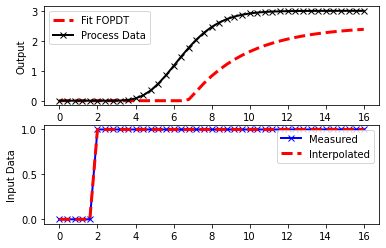

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

# define process model (to generate process data)
def process(y,t,n,u,Kp,taup):
    # arguments
    #  y[n] = outputs
    #  t    = time
    #  n    = order of the system   
    #  u    = input value
    #  Kp   = process gain
    #  taup = process time constant

    # equations for higher order system
    dydt = np.zeros(n)
    # calculate derivative
    dydt[0] = (-y[0] + Kp * u)/(taup/n)
    for i in range(1,n):
       dydt[i] = (-y[i] + y[i-1])/(taup/n)
    return dydt

# define first-order plus dead-time approximation    
def fopdt(y,t,uf,Km,taum,thetam):
    # arguments
    #  y      = output
    #  t      = time
    #  uf     = input linear function (for time shift)
    #  Km     = model gain
    #  taum   = model time constant
    #  thetam = model time constant
    #  time-shift u
    try:
        if (t-thetam) <= 0:
            um = uf(0.0)
        else:
            um = uf(t-thetam)
    except:
        #print('Error with time extrapolation: ' + str(t))
        um = 0
    # calculate derivative
    dydt = (-y + Km * um)/taum
    return dydt

# specify number of steps
ns = 40
# define time points
t = np.linspace(0,16,ns+1)
delta_t = t[1]-t[0]
# define input vector
u = np.zeros(ns+1)
u[5:] = 1.0
# create linear interpolation of the u data versus time
uf = interp1d(t,u)

# use this function or replace yp with real process data
def sim_process_data():
    # higher order process
    n=10       # order
    Kp=3.0    # gain
    taup=5.0   # time constant
    # storage for predictions or data
    yp = np.zeros(ns+1)  # process
    for i in range(1,ns+1):
        if i==1:
            yp0 = np.zeros(n)
        ts = [delta_t*(i-1),delta_t*i]
        y = odeint(process,yp0,ts,args=(n,u[i],Kp,taup))
        yp0 = y[-1]
        yp[i] = y[1][n-1]
    return yp
yp = sim_process_data()

# simulate FOPDT model with x=[Km,taum,thetam]
def sim_model(Km,taum,thetam):
    # input arguments
    #Km 
    #taum 
    #thetam 
    # storage for model values
    ym = np.zeros(ns+1)  # model
    # initial condition
    ym[0] = 0
    # loop through time steps    
    for i in range(1,ns+1):
        ts = [delta_t*(i-1),delta_t*i]
        y1 = odeint(fopdt,ym[i-1],ts,args=(uf,Km,taum,thetam))
        ym[i] = y1[-1]
    return ym    

# calculate model with updated parameters
Km = 2.5
taum = 3.0
thetam = 5.0
ym = sim_model(Km,taum,thetam)

# plot results
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,ym,'r--',linewidth=3,label='Fit FOPDT')
plt.plot(t,yp,'kx-',linewidth=2,label='Process Data')
plt.ylabel('Output')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,u,'bx-',linewidth=2)
plt.plot(t,uf(t),'r--',linewidth=3)
plt.legend(['Measured','Interpolated'],loc='best')
plt.ylabel('Input Data')
plt.show()

In [7]:
n = 100 # time points to plot
tf = 20.0 # final time
SP_start = 2.0 # time of set point change

def process(y,t,u):
    Kp = 4.0
    taup = 3.0
    thetap = 1.0
    if t<(thetap+SP_start):
        dydt = 0.0  # time delay
    else:
        dydt = (-y + Kp * u)/taup
    return dydt

def pidPlot(Kc,tauI,tauD):
    t = np.linspace(0,tf,n) # create time vector
    P= np.zeros(n)          # initialize proportional term
    I = np.zeros(n)         # initialize integral term
    D = np.zeros(n)         # initialize derivative term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.zeros(n)        # initialize process variable
    SP = np.zeros(n)        # initialize setpoint
    SP_step = int(SP_start/(tf/(n-1))+1) # setpoint start
    SP[0:SP_step] = 0.0     # define setpoint
    SP[SP_step:n] = 4.0     # step up
    y0 = 0.0                # initial condition
    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[i-1],))  # compute next step
        y0 = y[1]                  # record new initial condition
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kc * e[i]           # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt  # calculate integral term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i] # calculate new controller output
        
    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Process Variable (PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = $\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = $-K_c \tau_D \frac{d(PV)}{dt}$')    
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Controller Output (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')
    
Kc_slide = wg.FloatSlider(value=0.1,min=-0.2,max=1.0,step=0.05)
tauI_slide = wg.FloatSlider(value=4.0,min=0.01,max=5.0,step=0.1)
tauD_slide = wg.FloatSlider(value=0.0,min=0.0,max=1.0,step=0.1)
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)

interactive(children=(FloatSlider(value=0.1, description='Kc', max=1.0, min=-0.2, step=0.05), FloatSlider(valu…

<function __main__.pidPlot(Kc, tauI, tauD)>